Grade=95/100

# Lab 7: Radio Astronomy

## Introduction: 
In this lab, we used the Radio dish on top of Angell hall to take radio data. We used the data we took originally to figure out just how we were going to calculate the galactic rotation curve. We first manipulated the offset data from the sun, then we were given galaxy data to work with. The goal was to calculate the rotation curve of the Galaxy, which provides evidence for dark matter in the Galaxy.

## Abstract:
Data was taken using the radio telescope on top of Angell Hall. Elevation and azimuth scans were taken so we could write a starting code that would then be used for the Galaxy data. Using the 21 cm radiation line for hydrogen in large gas clouds, the galaxy data was taken so that the galactic rotation curve could be calculated. Theoretically, as you near the edge of the galaxy, stars should slow down. However, this is not the case. This is one of the biggest supporting facts for the existence of dark matter, because without the mass of dark matter a galaxy would be torn apart.


## Methods:
We took several different scans using the radio telescope. The scans showed the 21cm radiation line which we used in calculating velocities of hydrogen clouds. The data was reduced and analyzed. Some equations derived from geometries were used in order to find the radius and the velocities of the clouds at different angles. These equations can be seen in the code below.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import ndimage
import sys
from scipy.optimize import curve_fit
from IPython.display import Image
import math
from scipy.interpolate import UnivariateSpline

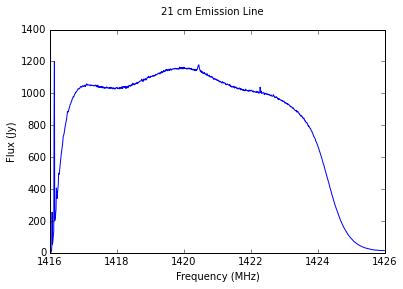

1178.94091667


In [10]:
"""Figure out frequency range of 21 cm line"""
root = '/n/Users/bditt/Desktop/LAB7NewNew/'
el_1 = open('/n/Users/bditt/Desktop/LAB7NewNew/sun_elevation/sun_el_m1')
with el_1 as obj:
    data1 = obj.readlines()
result = []
for line in range(len(data1)):
    t = line * 4 + 3
    if t > len(data1):
        break
    real = np.float64(data1[t].split())
    result.append(real)
el_1 = np.average(result, axis=0)
fx = np.arange(1416,1426,0.009766)
plt.plot(fx,el_1)
#plt.axvline(x=fx[448],color='k',ls='solid')
#plt.axvline(x=fx[461],color='k',ls='solid')
#plt.xlim([1420.3,1420.55])
#plt.ylim([1000,1200])
plt.xlabel('Frequency (MHz)')
plt.ylabel('Flux (Jy)')
plt.suptitle('21 cm Emission Line')
plt.show()
"Here I open one Elevation file, and average out every scan in the file and plot it against the frequency"

In [11]:
"""Read in elevation data"""
elevations = ['sun_el_m5', 'sun_el_m4', 'sun_el_m3', 'sun_el_m2', 
             'sun_el_m1', 'sun_el_p1', 'sun_el_p2', 'sun_el_p3', 
             'sun_el_p4', 'sun_el_p5', 'sun_el_p6', 'sun_el_p7', 
             'sun_el_p8', 'sun_el_p9', 'sun_el_p10']
avgEL = []
DataRows = [3,7,11,15,19,23,27,31,35]
for i in range(len(elevations)):
    Val = []
    EL = open(root+'sun_elevation/'+elevations[i])
    with EL as obj:
        lines = obj.readlines()
    for t in range(len(DataRows)):
        data = np.float64(lines[DataRows[t]].split())
        Val.append(data)
    avgEL.append(np.average(Val,axis=0))

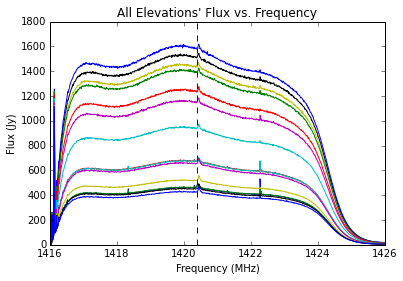

In [12]:
for i in range(len(avgEL)):
    plt.plot(fx,avgEL[i])
plt.title('All Elevations\' Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

"This plot is similar to the last except it is over every elevation that we read in."

In [13]:
'Here I calculate the peaks of each offset, then create an offset array so I can plot them'
Peaks_yo = []
for i in range(len(avgEL)):
    value = max(avgEL[i][100:1000])
    Peaks_yo.append(value)
offsets = [-5.,-4.,-3.,-2.,-1.,1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]

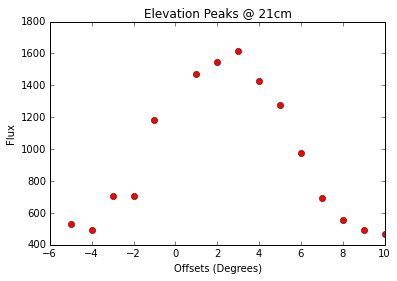

In [14]:
plt.plot(offsets,Peaks_yo,'o',c='r')
plt.title('Elevation Peaks @ 21cm')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Flux')

In [15]:
mean = []
for i in range(len(offsets)):
    boop = (offsets[i]*Peaks_yo[i])
    mean.append(boop)
mean = sum(mean)/len(mean)
sigma = []
for i in range(len(offsets)):
    spoop = (Peaks_yo[i]*(offsets[i]-mean)**2)
    sigma.append(spoop)
sigma = np.average(sigma)

Estimated Beam Width = 9.98370683164 degrees.


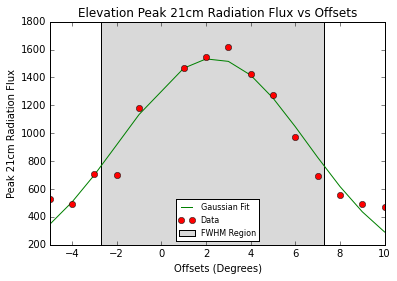

In [16]:
"""This code is used to fit a gaussian function to the data plotted above. I define a simple gaussian function and then use
curve fit to guess parameters for the equation that I give it. I also use UnivariateSpline to find the FWHM of that
equation."""
def gauss_function(offsets, a, x0, sigma):
    return a*np.exp(-(offsets-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, offsets, Peaks_yo)

spline = UnivariateSpline(offsets, gauss_function(offsets, *popt)-(np.max(gauss_function(offsets, *popt))/2))
r1, r2 = spline.roots()

print 'Estimated Beam Width = ' + str(r2-r1) + ' degrees.'
plt.plot(offsets, gauss_function(offsets, *popt),c='g',label='Gaussian Fit')
plt.plot(offsets,Peaks_yo,'o',c='r',label='Data')
plt.axvspan(r1, r2, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
plt.legend(loc = 8,fontsize=8)
plt.xlim(-5,10)
plt.show()

In [17]:

azimuths = ['sun-9_0.dat','sun-8_0.dat','sun-7_0.dat','sun0_-6.dat','sun-6_0.dat','sun-5_0.dat',
            'sun-4_0.dat','sun-3_0.dat','sun-2_0.dat','sun-1_0.dat','sun0_0.dat',
            'sun1_0.dat','sun2_0.dat','sun3_0.dat','sun4_0.dat','sun5_0.dat','sun6_0.dat',
            'sun7_0.dat','sun8_0.dat','sun9_0.dat','sun10_0.dat']
avgAZ = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(azimuths)):
    Val = []
    AZ = open(root+'sun_azimuth/'+azimuths[i])
    with AZ as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        Val.append(data)
    avgAZ.append(np.average(Val,axis=0))

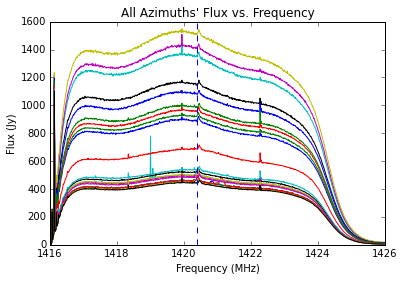

In [18]:
for i in range(len(avgAZ)):
    plt.plot(fx,avgAZ[i])
plt.title('All Azimuths\' Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
plt.show()

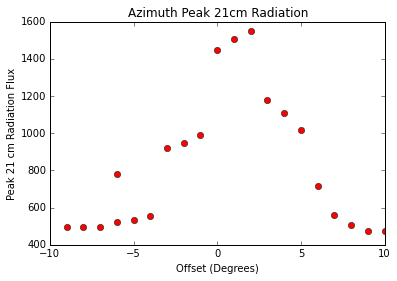

In [19]:
Peaks_AZ = []
for i in range(len(avgAZ)):
    value = max(avgAZ[i][100:1000])
    Peaks_AZ.append(value)
offaz = [-9,-8,-7,-6,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]
plt.plot(offaz,Peaks_AZ,'o',c='r')
plt.xlabel('Offset (Degrees)')
plt.ylabel('Peak 21 cm Radiation Flux')
plt.title('Azimuth Peak 21cm Radiation')
plt.show()

In [20]:
mean = []
for i in range(len(offaz)):
    boop = (offaz[i]*Peaks_AZ[i])
    mean.append(boop)
mean = sum(mean)/len(mean)
sigma = []
for i in range(len(offaz)):
    spoop = (Peaks_AZ[i]*(offaz[i]-mean)**2)
    sigma.append(spoop)
sigma = np.average(sigma)

Estimated Beam Width = 12.8318357606 degrees.


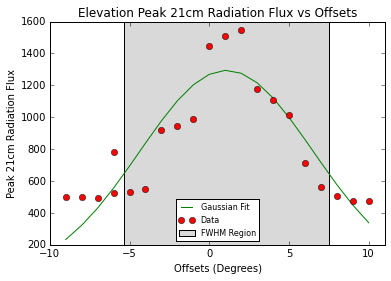

In [21]:
def gauss_function(offaz, a, x0, sigma):
    return a*np.exp(-(offaz-x0)**2/(2*sigma**2))
popt, pcov = curve_fit(gauss_function, offaz, Peaks_AZ)

spline = UnivariateSpline(offaz, gauss_function(offaz, *popt)-(np.max(gauss_function(offaz, *popt))/2))
r1, r2 = spline.roots()

print 'Estimated Beam Width = ' + str(r2-r1) + ' degrees.'
plt.plot(offaz, gauss_function(offaz, *popt),c='g',label='Gaussian Fit')
plt.plot(offaz,Peaks_AZ,'o',c='r',label='Data')
plt.axvspan(r1, r2, facecolor = '0.85',label='FWHM Region')
plt.xlabel('Offsets (Degrees)')
plt.ylabel('Peak 21cm Radiation Flux')
plt.title('Elevation Peak 21cm Radiation Flux vs Offsets')
plt.legend(loc = 8,fontsize=8)
plt.xlim(-10,11)
plt.show()

In [22]:
"Here I begin 'part 2' of the Lab and begin doing the same methods to the calibration data and the actual data"
cal = ['calib_5m.dat']
avgcal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(cal)):
    num = []
    c = open(root+'Galaxy_Data/'+cal[i])
    with c as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avgcal.append(np.average(num,axis=0))

In [24]:
"This routine is reading in the Galaxy data and averageing it out, and then subtracting out the calibration data"

galaxy = ['Gal_0_5m.dat','Gal10_5m.dat','Gal20_5m.dat','Gal30_5m.dat','Gal40_5m.dat',
          'Gal50_5m.dat','Gal60_5m.dat','Gal70_5m.dat','Gal80_5m.dat','Gal90_5m.dat']
avggal = []
datalines = [3,7,11,15,19,23,27,31,35]
for i in range(len(galaxy)):
    num = []
    g = open(root+'Galaxy_Data/'+galaxy[i])
    with g as obj:
        lines = obj.readlines()
    for t in range(len(datalines)):
        data = np.float64(lines[datalines[t]].split())
        num.append(data)
    avggal.append(np.average(num,axis=0))
avgal = []
for i in range(len(avggal)):
    new = avggal[i]-avgcal[0]
    avgal.append(new)

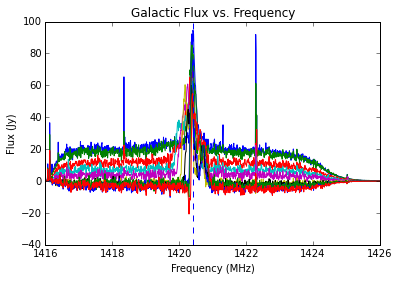

In [44]:
for i in range(len(avgal)):
    plt.plot(fx,avgal[i])
plt.title('Galactic Flux vs. Frequency')
plt.ylabel('Flux (Jy)')
plt.axvline(1420.4,linestyle='--') #this is the frequency of 21cm radiation in MHz
plt.xlabel('Frequency (MHz)')
#plt.xlim(1420.2,1420.6)
plt.show()

"This is the Calibrated flux plot, mostly all that is left now is the 21 cm emission."

In [31]:
"""To find the minimum velocity, I found where the minimum 21cm radiation was.
I then put this data into a list and subtracted the actual 21cm velocity to get the difference. I then calculated 
the doppler velocities."""
twentyonecm = 1420.4
twentyonemaxg = [1420.3,1420.2,1419.8,1419.8,1419.9,1420,1420.1,1420.3,1420.3,1420.3]
twentyonecmin = []
for i in range(len(twentyonemaxg)):
    new = twentyonecm-twentyonemaxg[i]
    twentyonecmin.append(new)
twentyonecv = []
for i in range(len(twentyonecmin)):
    n = (twentyonecmin[i]/twentyonecm)*2.99e5
    twentyonecv.append(n)

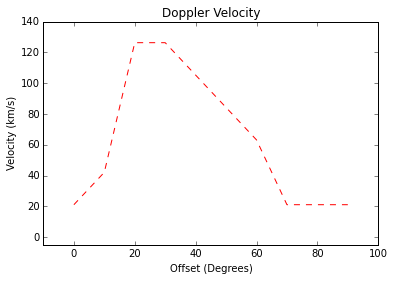

In [39]:
degs = np.arange(0,100,10)
plt.plot(degs,twentyonecv,'r--')
plt.xlim(-10,100)
plt.ylim(-5,140)
plt.xlabel('Offset (Degrees)')
plt.ylabel('Velocity (km/s)')
plt.title('Doppler Velocity')
txt = """"""
plt.text(-30,-90,txt,color='k',fontsize=11)
plt.show()

In [41]:
"""I am now adjusting the doppler velocities to get real velocities and correcting for the 
movement of the sun."""
ro = 8
vo = 230
v = []
r = []
for i in range(len(twentyonecv)):
    new = abs((vo+twentyonecv[i])*np.sin(np.deg2rad(degs[i])))
    v.append(new)
for i in range(len(degs)):
    new = abs(ro*np.sin(np.deg2rad(degs[i])))
    r.append(new)

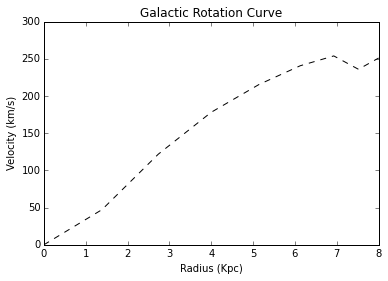

In [43]:
plt.plot(r,v,'k--')
plt.xlabel('Radius (Kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Galactic Rotation Curve')
txt = """"""
plt.text(-1.5,-100,txt,color='k',fontsize=11)
plt.show()

## Results
The results of this data and my calculations using my code have produced a proper prediction consistent with dark matter. As you
get farther away from the center of the galaxy, the matter begins to move faster. This is not what is expected dynamically, as things would get slower as you move away from them, like in typical orbits of the solar system. These results point to something else that is causing this increase in velocity, aka dark matter.

## Conclusion
The coding in this lab was a lot less transparent than in other labs. Though it was quite the challenge, I have to say that the results are worth it, because we are doing real Astronomy. Overall the results were conclusive to other studies, and it was a good learning experience.